# Overview:  HW3 - Question 4

In this coding question, you'll implement a classifier with logistic regression
$$ F(w) = \frac{1}{N} \sum_{i=1}^N \log( 1 + e^{-\langle w, x_i \rangle y_i} ). $$

For this problem, I would suggest using functions to prepare the dataset, run gradient descent, and return classification error.  By doing this, you only have to write the code one time and just use the functions to return results for part (4c).

# Loading MNIST Data

In this section, you will learn to load MNIST data.  If you do not have tensorflow available on your jupyter notebook, uncomment the next cell, run it, restart the kernel, and comment the next cell once more.

In [1]:
#!pip3 install sklearn

In [2]:
# import statements
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
# this cell will take a minute to run depending on your internet connection
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (70000, 784) y shape: (70000,)


In [4]:
# this cell processes some of the data

# if this returns an error of the form "KeyError: 0", then try running the following first:

X = X.values # this converts X from a pandas dataframe to a numpy array
#you can also use a defaultdict here
digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X[j].reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


In [5]:
# this cell would stack 100 examples from each class together
# this cell also ensures that each pixel is a flot between 0 and 1 instead of an int between 0 and 255
data = []
for i in range(10):
    flattened_images = digits[i][:100].reshape(100,-1)
    data.append(flattened_images)
    
data = np.vstack(data)
data = data.astype('float32') / 255.0

# (4a) Plotting

Display one randomly selected image from your training data for each digit class. Provide the index number for each image.

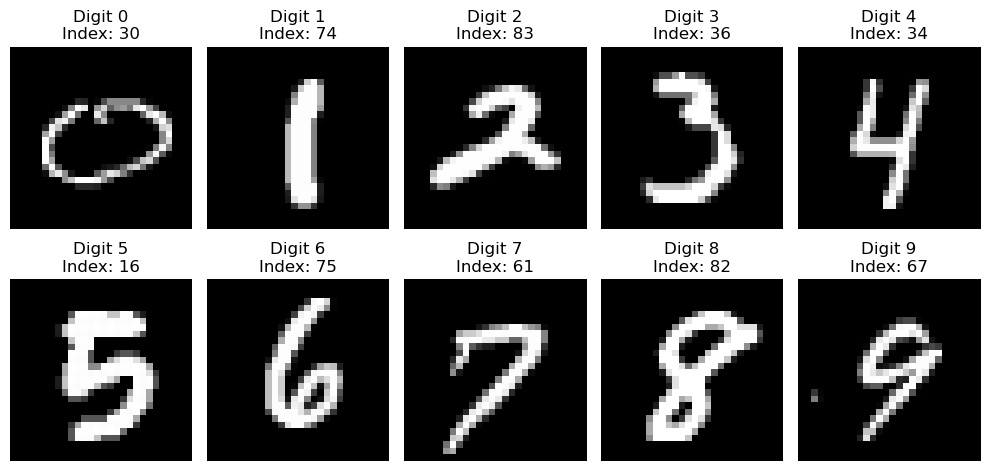

In [6]:
# plot data here (this should have an output)

def plot_data():
    plt.figure(figsize=(10, 5)) 
    for i in range(10):
        plt.subplot(2, 5, i+1)
        random_num = np.random.randint(0, 100) #it's best to use the random randint because we are using a numpy object, else we could have used random
        plt.imshow(data[i*100 + random_num].reshape(28, 28), cmap='gray')
        plt.title(f'Digit {i}\nIndex: {random_num}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

if __name__=="__main__":
    plot_data()

# (4b) Label data

Select the first 500 examples of 0’s and 1’s for this example, those will form the training data $(x_i , y_i) \in \mathbb{R}^{784} \times \{−1,1\}, i = 1,...,1000$. Assign label $y_i = 1$ for 1s and $y_i = −1$ for 0s.  Also, renormalize your $x_i$ so that the pixel values are floats between 0 and 1, instead of ints from 0 to 255.  You can do this by augmenting the code given above for stacking data from different classes.

In [7]:
zeros = digits[0][:500].reshape(500, 784)  # Reshape from (500, 28, 28) to (500, 784)
ones = digits[1][:500].reshape(500, 784)   # Reshape from (500, 28, 28) to (500, 784)

# Step 2: Stack the data and normalize to [0,1]
X_train = np.vstack((zeros, ones)).astype('float32') / 255.0

# Step 3: Create labels (-1 for zeros, 1 for ones)
y_train = np.concatenate([-np.ones(500), np.ones(500)])

# Verify the shapes and data
print("Training data shape:", X_train.shape)
print("Labels shape:", y_train.shape)
print("Label values:", np.unique(y_train))
print("X range:", np.min(X_train), "to", np.max(X_train))

Training data shape: (1000, 784)
Labels shape: (1000,)
Label values: [-1.  1.]
X range: 0.0 to 1.0


# (4c) Running Gradient Descent

Implement and run a Gradient Descent algorithm, with step-size $\mu = 10^{-4}$, to optimize the function above associated with this setup. You should run your algorithm for at least $T = 10,000$ iterations, but if your computer can handle it try $T=100,000$ or until a reasonable stopping criterion is satisfied.  Provide a plot showing the value of $F(w)$ at each iteration. Also, feel free to adjust $\mu$ to be larger / smaller if the plot does not match your expectations.

Training...
Iteration 100, Loss: 0.657571
Iteration 200, Loss: 0.625512
Iteration 300, Loss: 0.596741
Iteration 400, Loss: 0.570753
Iteration 500, Loss: 0.547131
Iteration 600, Loss: 0.525532
Iteration 700, Loss: 0.505679
Iteration 800, Loss: 0.487344
Iteration 900, Loss: 0.470337
Iteration 1000, Loss: 0.454504
Iteration 1100, Loss: 0.439715
Iteration 1200, Loss: 0.425862
Iteration 1300, Loss: 0.412850
Iteration 1400, Loss: 0.400602
Iteration 1500, Loss: 0.389049
Iteration 1600, Loss: 0.378131
Iteration 1700, Loss: 0.367797
Iteration 1800, Loss: 0.358000
Iteration 1900, Loss: 0.348699
Iteration 2000, Loss: 0.339859
Iteration 2100, Loss: 0.331446
Iteration 2200, Loss: 0.323431
Iteration 2300, Loss: 0.315787
Iteration 2400, Loss: 0.308489
Iteration 2500, Loss: 0.301516
Iteration 2600, Loss: 0.294847
Iteration 2700, Loss: 0.288464
Iteration 2800, Loss: 0.282348
Iteration 2900, Loss: 0.276486
Iteration 3000, Loss: 0.270860
Iteration 3100, Loss: 0.265460
Iteration 3200, Loss: 0.260271
Itera

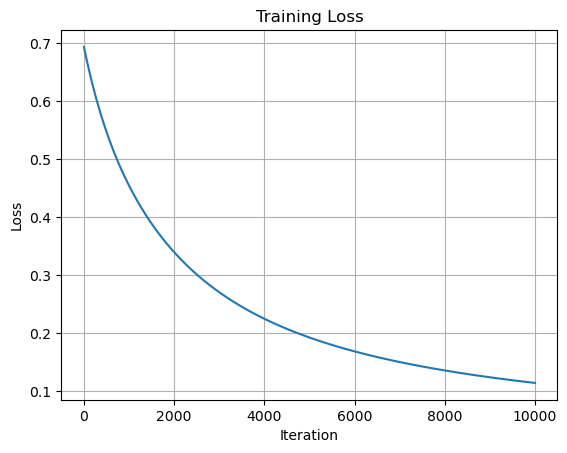

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#code here is inspired from the intuition of gradient descent, Yann LeCun MNIST
def train_logistic_regression(X, y, learning_rate=1e-4, n_iterations=10000):
    # Initialize weights to zero
    
    w = np.zeros(X.shape[1])
    losses = []
    
    # Main training loop
    for i in range(n_iterations):
        # Forward pass (compute loss)
        z = -y * np.dot(X, w)
        loss = np.mean(np.logaddexp(0, z))
        losses.append(loss)
        
        # Backward pass (compute gradient and update)
        sigmoid = 1 / (1 + np.exp(-z))
        gradient = -1/len(y) * np.dot(X.T, y * sigmoid)
        w = w - learning_rate * gradient
        
        # Print progress every 100 iterations
        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1}, Loss: {loss:.6f}")
    
    return w, losses

print("Training...")
w, losses = train_logistic_regression(X_train, y_train)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# (4d) Discussion about gradient descent

Comment on the resulting plot. In particular, does the shape of $F(w)$ suggest you've successfully converged to a local or global minimum?  Does it appear you chose a good stopping criteria?  Explain whether your
answers to these questions are consistent with the theory we discussed in class (and in the
notes). Be specific i.e., point to a specific theorem (or theorems) and indicate
why it does or does not explain the behavior of the algorithm.  Would the theory dictate a different choice of $\mu$ than the one we used?

Put discussion here:

Now, use the $w$ you found from part (a) to classify the first 500 \emph{test} data points associated to
each of the 0 and 1 handwritten digits. Recall that you need to use the function $y = \text{sign}(w^T x)$
to classify. What was the classification error rate associated with the two digits on the test
data (this should be a number between 0 and 1)? What was it on the training data?  Does this relationship make sense?

In [17]:
# Select the next 500 examples of 0s and 1s for testing
X_test_zeros = digits[0][500:1000].reshape(500, 784)  # Next 500 images of digit 0
X_test_ones = digits[1][500:1000].reshape(500, 784)  # Next 500 images of digit 1

# Stack the test data for 0s and 1s into a single array
X_test = np.vstack((X_test_zeros, X_test_ones))
# Step 2: Stack the data and normalize to [0,1]
X_train = np.vstack((zeros, ones)).astype('float32') / 255.0

# Step 3: Create labels (-1 for zeros, 1 for ones)
y_train = np.concatenate([-np.ones(500), np.ones(500)])

print(X_test.shape)
# Create labels for the test data: -1 for 0s, +1 for 1s
y_test = np.concatenate((-np.ones(500), np.ones(500)))


(1000, 784)


In [24]:

def classify(X, w):
    """
    Classify data points using the learned weight vector w.
    Args:
        X (numpy array): Data matrix where each row is a data point.
        w (numpy array): Learned weights from logistic regression.
    Returns:
        numpy array: Predicted labels (+1 or -1).
    """
    return np.sign(np.dot(X, w))

def calculate_error_rate(y_true, y_pred):
    """
    Calculate the classification error rate using pure boolean logic.
    Args:
        y_true (numpy array): True labels.
        y_pred (numpy array): Predicted labels.
    Returns:
        float: Error rate as a number between 0 and 1.
    """
    # Boolean array where True represents an incorrect prediction
    incorrect = y_true != y_pred
    # Calculate error rate as the mean of the boolean array (True = 1, False = 0)
    return np.mean(incorrect)

# Calculate the training error rate
y_train_pred = classify(X_train, w)
train_error_rate = calculate_error_rate(y_train, y_train_pred)
print("Training Error Rate:", train_error_rate)

# Calculate the test error rate
y_test_pred = classify(X_test, w)
test_error_rate = calculate_error_rate(y_test, y_test_pred)
print("Test Error Rate:", test_error_rate)


Training Error Rate: 0.003
Test Error Rate: 0.004
